In [3]:
## Manipulación de datos
import pandas as pd
import numpy as np

## Visualización
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Modelos
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import  StandardScaler

In [4]:
df = pd.read_csv(r'..\..\data\processed\Merch_ML.csv',index_col='Order_ID')
df.head()

,Order_Date,Buyer_Age,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating,Product_ID,Order_Location,International_Shipping,Buyer_Gender,Product_Category_Clothing,Product_Category_Ornaments,Product_Category_Other
Order_ID,,,,,,,,,,,,,,,
189440,2024-07-21,30,100,0,100,1,100,4,0,15,0,1,1.0,0.0,0.0
187385,2024-07-20,32,100,0,100,1,100,3,0,6,0,1,1.0,0.0,0.0
181844,2024-07-21,26,9,40,49,1,49,2,1,1,1,0,0.0,0.0,1.0
197934,2024-08-19,28,9,0,9,2,18,3,1,18,0,1,0.0,0.0,1.0
122470,2024-01-06,19,10,0,10,3,30,5,2,11,0,0,0.0,0.0,1.0


In [5]:
X = df.drop(columns=['Quantity','Order_Date'])
y = df['Quantity']

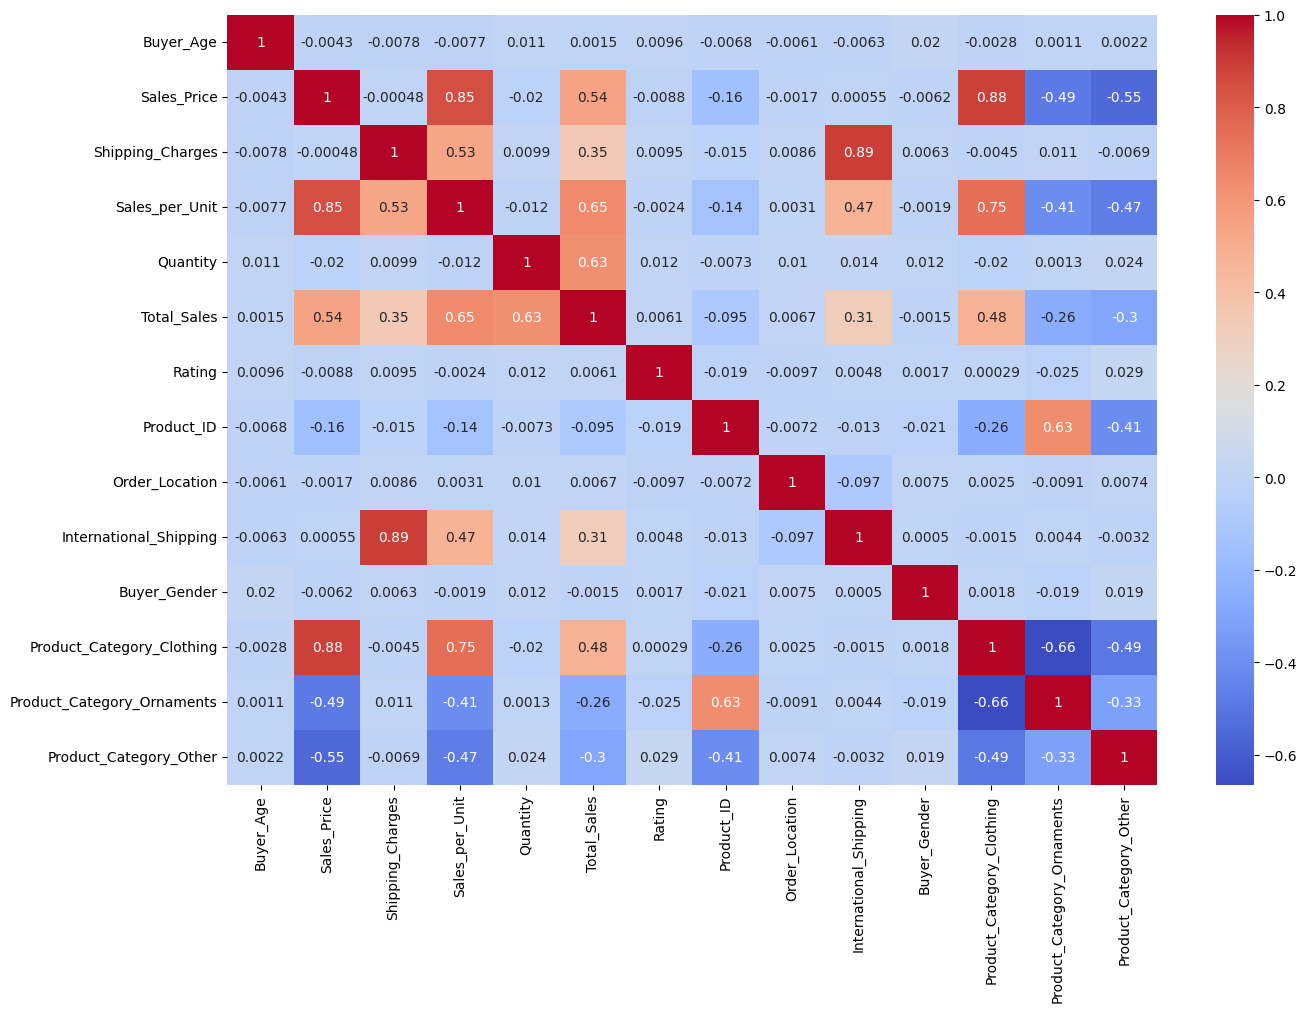

In [6]:
df_corr = df.drop(columns='Order_Date')
df_corr = df_corr.corr()

plt.figure(figsize=(15,10))

sns.heatmap(df_corr,annot=True,cmap='coolwarm');

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train - 1
y_test = y_test - 1

In [8]:
model = XGBClassifier(
    objective='multi:softmax',  # Predice la clase directamente
    num_class=5,  # Número de clases (si las clases son 1,2,3,4,5)
    eval_metric='mlogloss',  # Función de pérdida para multiclase
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9959432048681541
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       978
           1       1.00      1.00      1.00       223
           2       1.00      0.99      1.00       143
           3       0.95      0.98      0.97        85
           4       0.96      0.94      0.95        50

    accuracy                           1.00      1479
   macro avg       0.98      0.98      0.98      1479
weighted avg       1.00      1.00      1.00      1479



In [9]:
y_pred =  y_pred + 1
y_pred

array([1, 1, 3, ..., 1, 1, 3], shape=(1479,), dtype=int32)

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [1]:
from tensorflow import keras
from keras import layers

# Crear modelo
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(5, activation='softmax')
])

# Compilar
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                               patience=30,
                                               min_delta=0.01,
                                               restore_best_weights=True,
                                               )

reduce_lr = keras.callbacks.ReduceLROnPlateau(factor=0.2,
                                              patience=10,
                                              min_lr=0.00001,
                                              monitor='val_loss')

# Entrenar
model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32,callbacks=[early_stopping, reduce_lr])


NameError: name 'X_train' is not defined

In [20]:
model.summary();

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,193 (39.82 KB)

 Trainable params: 3,333 (13.02 KB)

 Non-trainable params: 192 (768.00 B)

 Optimizer params: 6,668 (26.05 KB)

In [28]:
keras_pred = model.predict(X_test)

# Convertir probabilidades a 0 o 1 con umbral de 0.5
keras_pred_bin = (keras_pred > 0.5).astype(int)

# Evaluar con sklearn
test_mse,test_mae = model.evaluate(X_test,y_test,verbose=0)

print(f'MSE: {test_mse:.4f}')
print(f'MAE: {test_mae:.4f}')

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 872us/step
MSE: 0.0129
MAE: 0.9980
